In [2]:
import glob

from astropy.io import fits
import astropy.table as at
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# gala
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

In [23]:
galcen_frame = coord.Galactocentric(galcen_distance=8.1*u.kpc)

In [3]:
tbl = at.Table.read('../data/hayes_odisk_mem_nosgr.txt', 
                    format='ascii.commented_header')
tbl.rename_column('APOID', 'APOGEE_ID')

In [4]:
allstar = at.Table.read('../../hq/data/allStarLite-r12-l33.fits')
dr2 = at.Table.read('../../hq/data/apogeedr16-result.fits')
dr2.rename_column('apogee_id', 'APOGEE_ID')

In [5]:
sh = at.Table.read('/mnt/ceph/users/apricewhelan/data/starhorse/apogee_starhorse-DR16.fits')
sh['APOGEE_ID'] = sh['APOGEE_ID'].astype(str)

In [11]:
tmp = at.join(tbl, allstar, keys='APOGEE_ID')
tmp = tmp[np.unique(tmp['APOGEE_ID'], return_index=True)[1]]

tmp = at.join(tmp, sh, keys='APOGEE_ID')

master = at.join(tmp, dr2, keys='APOGEE_ID')
master = master[np.unique(master['APOGEE_ID'], return_index=True)[1]]

In [20]:
c = coord.SkyCoord(ra=master['ra'],
                   dec=master['dec'],
                   distance=master['dist50']*u.kpc,
                   pm_ra_cosdec=master['pmra'],
                   pm_dec=master['pmdec'],
                   radial_velocity=master['VHELIO_AVG']*u.km/u.s)

In [24]:
galcen = c.transform_to(galcen_frame)

In [25]:
w0 = gd.PhaseSpacePosition(galcen.data)

In [26]:
pot = gp.MilkyWayPotential()

In [27]:
orbits = pot.integrate_orbit(w0, dt=-1.*u.Myr, t1=0, t2=-1*u.Gyr)

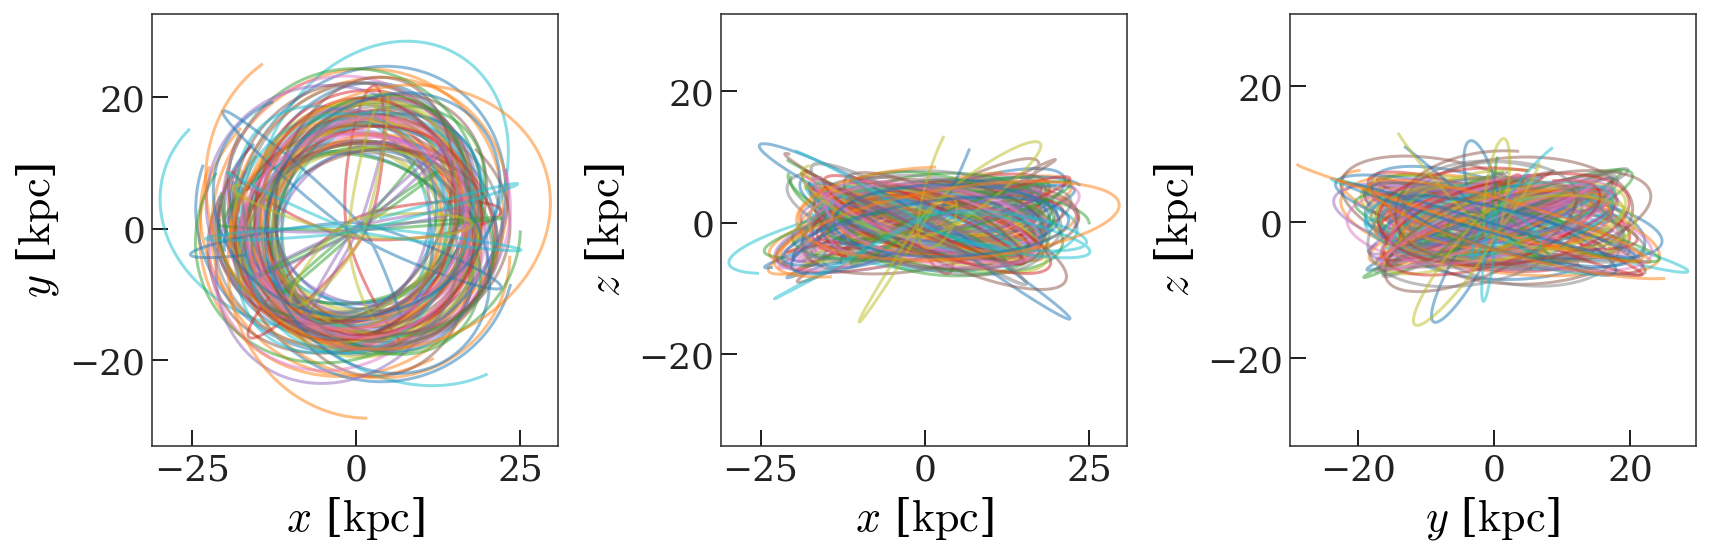

In [35]:
fig = orbits.plot(alpha=0.5)
fig.savefig('../plots/orbits_xyz.png', dpi=250)

In [39]:
cyl_orbits = orbits.cylindrical
ecc_mask = orbits.eccentricity() < 0.6

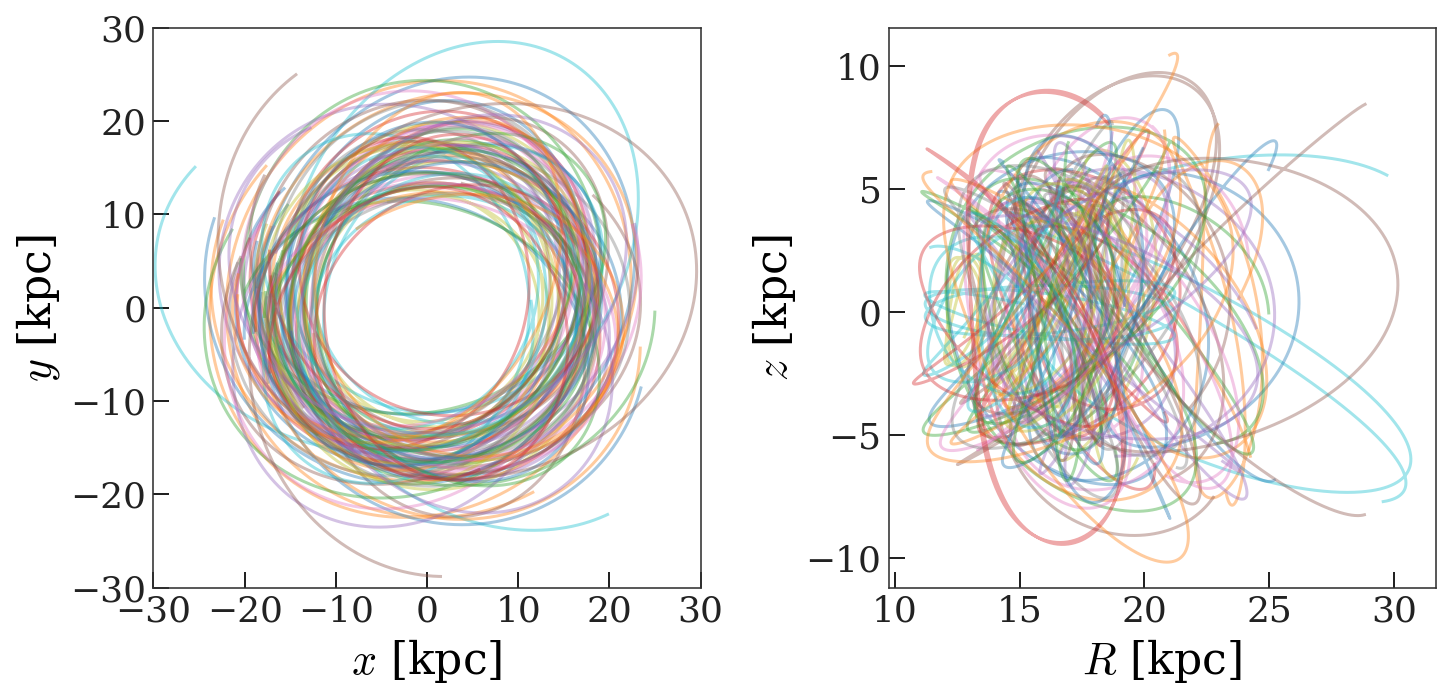

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10.2, 5.))

ax = axes[0]
ax.plot(orbits.x.value[:, ecc_mask], orbits.y.value[:, ecc_mask], 
        marker='', alpha=0.4) #, color='k');

ax.set_xlabel('$x$ [kpc]')
ax.set_ylabel('$y$ [kpc]')

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)

ax.set_xticks(np.arange(-30, 30+1, 10))

ax = axes[1]
ax.plot(cyl_orbits.rho.value[:, ecc_mask], cyl_orbits.z.value[:, ecc_mask], 
        marker='', alpha=0.4) #, color='k');

ax.set_xlabel('$R$ [kpc]')
ax.set_ylabel('$z$ [kpc]')

fig.tight_layout()

fig.savefig('../plots/orbits_xy_Rz_color.pdf')

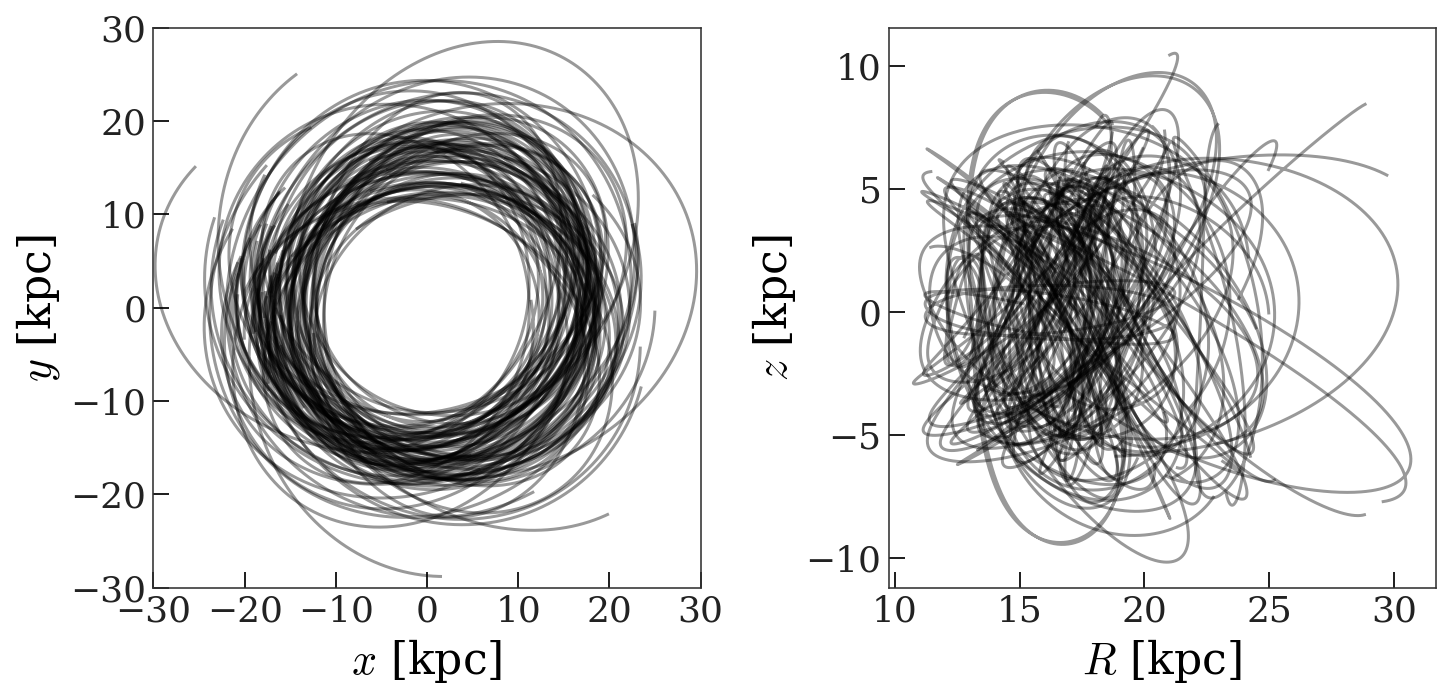

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10.2, 5.))

ax = axes[0]
ax.plot(orbits.x.value[:, ecc_mask], orbits.y.value[:, ecc_mask], 
        marker='', alpha=0.4, color='k');

ax.set_xlabel('$x$ [kpc]')
ax.set_ylabel('$y$ [kpc]')

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)

ax.set_xticks(np.arange(-30, 30+1, 10))

ax = axes[1]
ax.plot(cyl_orbits.rho.value[:, ecc_mask], cyl_orbits.z.value[:, ecc_mask], 
        marker='', alpha=0.4, color='k');

ax.set_xlabel('$R$ [kpc]')
ax.set_ylabel('$z$ [kpc]')

fig.tight_layout()

fig.savefig('../plots/orbits_xy_Rz_black.pdf')